### Big Data Analytics: Relationship between socio-economic indicators and criminal activities in an area

Importing packages:

In [0]:
from itertools import chain

import numpy as np
import pandas as pd
import seaborn as sns

from pyspark.sql.functions import udf, col, create_map, lit
from pyspark.sql.types import StringType, IntegerType, FloatType



#### Loading Data:

In [0]:
file_location = "/FileStore/tables/Census_Data___Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
censusdf = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(censusdf)

Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6
6,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5
7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2
8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1
9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8
10,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21


In [0]:
# File location and type
file_location = "/FileStore/tables/Crimes___2001_to_Present.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,false,true,924,9,12,61,08B,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117282,-87.669999562,"(41.815117282, -87.669999562)"
10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,false,false,1511,15,29,25,06,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080471,-87.765400451,"(41.895080471, -87.765400451)"
11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,false,true,631,6,8,44,06,null,null,2018,04/06/2019 04:04:43 PM,null,null,null
10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,true,false,1412,14,35,21,18,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937405765,-87.716649687,"(41.937405765, -87.716649687)"
10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,false,true,1522,15,28,25,08A,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903443,-87.755121152,"(41.881903443, -87.755121152)"
10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,false,false,614,6,21,71,05,1168430,1850165,2015,02/10/2018 03:50:01 PM,41.744378879,-87.658430635,"(41.744378879, -87.658430635)"
10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,false,false,1434,14,32,24,05,1161628,1912157,2015,02/10/2018 03:50:01 PM,41.914635603,-87.681630909,"(41.914635603, -87.681630909)"
10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,true,false,1034,10,25,31,06,1159734,1889313,2015,09/17/2015 11:37:18 AM,41.851988885,-87.689219118,"(41.851988885, -87.689219118)"
10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,false,true,1222,12,27,27,03,1155536,1900515,2015,02/10/2018 03:50:01 PM,41.88281374,-87.704325717,"(41.88281374, -87.704325717)"
11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,null,false,false,824,8,15,63,11,null,null,2016,04/06/2019 04:04:43 PM,null,null,null


#### Filtering Crime dataset by date range

In [0]:
crimedf = df.filter("Date < '01/01/2013 01:30:00 AM' AND Date > '01/01/2008 01:30:00 AM'").cache()
crimedf.count()
# crimedf = df

Out[222]: 8151

In [0]:
display(crimedf)

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11227247,JB147078,01/01/2012 09:00:00 AM,105XX S INDIANAPOLIS AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,false,false,432,4,10,52,11,null,null,2012,02/11/2018 03:57:41 PM,null,null,null
11042582,JA377037,01/01/2011 12:01:00 AM,054XX S CALIFORNIA AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,APARTMENT,true,true,923,9,14,63,02,null,null,2011,08/13/2017 03:50:54 PM,null,null,null
11042930,JA374409,01/01/2010 12:01:00 AM,080XX S MARSHFIELD AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,false,false,611,6,21,71,02,null,null,2010,08/05/2017 03:50:08 PM,null,null,null
11042914,JA374555,01/01/2008 12:01:00 AM,011XX S WHIPPLE ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,false,true,1134,11,28,29,02,null,null,2008,08/19/2017 03:48:07 PM,null,null,null
11030960,JA363404,01/01/2009 12:00:00 AM,007XX W 81ST ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,true,false,621,6,21,71,02,null,null,2009,10/28/2017 03:50:55 PM,null,null,null
10751224,HZ513641,01/01/2012 08:00:00 AM,010XX S MAYFIELD AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,false,false,1513,15,29,25,20,null,null,2012,07/27/2017 03:50:07 PM,null,null,null
11046665,JA381950,01/01/2009 12:00:00 AM,032XX W 65TH ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,false,false,831,8,17,66,17,null,null,2009,11/10/2018 04:02:39 PM,null,null,null
11648237,JC216157,01/01/2012 12:00:00 PM,115XX S CAMPBELL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,false,false,2212,22,19,75,11,null,null,2012,04/09/2019 04:24:58 PM,null,null,null
11229652,JB146448,01/01/2008 12:01:00 AM,018XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,false,false,2534,25,30,20,02,null,null,2008,02/14/2018 03:52:17 PM,null,null,null
11648597,JC216578,01/01/2012 12:00:00 AM,071XX S LOWE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,false,false,732,7,6,68,11,null,null,2012,04/09/2019 04:24:58 PM,null,null,null


#### Classification of Crime reports:

In [0]:
df.select('Primary Type').distinct().collect()

Out[224]: [Row(Primary Type='OFFENSE INVOLVING CHILDREN'),
 Row(Primary Type='CRIMINAL SEXUAL ASSAULT'),
 Row(Primary Type='STALKING'),
 Row(Primary Type='PUBLIC PEACE VIOLATION'),
 Row(Primary Type='OBSCENITY'),
 Row(Primary Type='NON-CRIMINAL (SUBJECT SPECIFIED)'),
 Row(Primary Type='ARSON'),
 Row(Primary Type='GAMBLING'),
 Row(Primary Type='CRIMINAL TRESPASS'),
 Row(Primary Type='ASSAULT'),
 Row(Primary Type='NON - CRIMINAL'),
 Row(Primary Type='LIQUOR LAW VIOLATION'),
 Row(Primary Type='MOTOR VEHICLE THEFT'),
 Row(Primary Type='THEFT'),
 Row(Primary Type='BATTERY'),
 Row(Primary Type='ROBBERY'),
 Row(Primary Type='HOMICIDE'),
 Row(Primary Type='PUBLIC INDECENCY'),
 Row(Primary Type='CRIM SEXUAL ASSAULT'),
 Row(Primary Type='HUMAN TRAFFICKING'),
 Row(Primary Type='INTIMIDATION'),
 Row(Primary Type='PROSTITUTION'),
 Row(Primary Type='DECEPTIVE PRACTICE'),
 Row(Primary Type='CONCEALED CARRY LICENSE VIOLATION'),
 Row(Primary Type='SEX OFFENSE'),
 Row(Primary Type='CRIMINAL DAMAGE'),
 Row(Primary Type='NARCOTICS'),
 Row(Primary Type='NON-CRIMINAL'),
 Row(Primary Type='OTHER OFFENSE'),
 Row(Primary Type='KIDNAPPING'),
 Row(Primary Type='BURGLARY'),
 Row(Primary Type='WEAPONS VIOLATION'),
 Row(Primary Type='OTHER NARCOTIC VIOLATION'),
 Row(Primary Type='INTERFERENCE WITH PUBLIC OFFICER'),
 Row(Primary Type='DOMESTIC VIOLENCE'),
 Row(Primary Type='RITUALISM')]

In [0]:
cat_map = {'theft' : ['THEFT', 'BURGLARY', 'ROBBERY', 'MOTOR VEHICLE THEFT'],
'violence' : ['ASSAULT', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'HOMICIDE',],
'narcotic' : ['NARCOTICS', 'OTHER NARCOTIC VIOLATION']}

def cat_mapping(x):
  for k, v in cat_map.items():
    if x in v:
      return k
  return 'other'

#### Adding new column for crime category

In [0]:
cat_udf = udf(cat_mapping, StringType())
crimedf = crimedf.withColumn('CrimeCategory', cat_udf(col('Primary Type'))).cache()

#### Visializing Corelation among 6 socio-economic indicators

Out[240]:

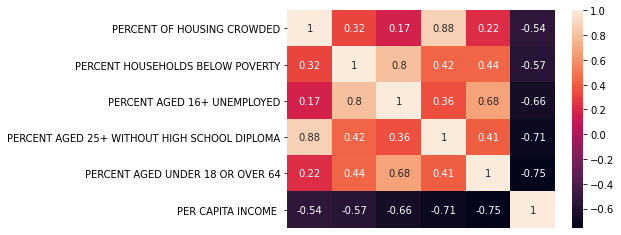

<matplotlib.axes._subplots.AxesSubplot at 0x7fd004653a00>

In [0]:
corr_df = censusdf.toPandas().iloc[:-1,1:-1].corr()
sns.heatmap(corr_df, xticklabels=False, yticklabels=corr_df.columns, annot=True)

#### Counting number of crime reports for each community area

In [0]:
crime_counts_for_area = {i[0]: i[1] for i in crimedf.groupby("Community Area").count().collect()}
try: del crime_counts_for_area[None]
except: pass

In [0]:
violent_crime_counts = {i[0]: i[1] for i in crimedf.where("CrimeCategory == 'violence'").groupby("Community Area").count().collect()}
try: del violent_crime_counts[None]
except: pass

In [0]:
theft_crime_counts = {i[0]: i[1] for i in crimedf.where("CrimeCategory == 'theft'").groupby("Community Area").count().collect()}
try: del theft_crime_counts[None]
except: pass

In [0]:
narcotic_crime_counts = {i[0]: i[1] for i in crimedf.where("CrimeCategory == 'narcotic'").groupby("Community Area").count().collect()}
try: del narcotic_crime_counts[None]
except: pass

In [0]:
crime_mapping_expr = create_map([lit(x) for x in chain(*crime_counts_for_area.items())])
violent_crime_mapping_expr = create_map([lit(x) for x in chain(*violent_crime_counts.items())])
theft_crime_mapping_expr = create_map([lit(x) for x in chain(*theft_crime_counts.items())])
narcotic_crime_mapping_expr = create_map([lit(x) for x in chain(*narcotic_crime_counts.items())])

In [0]:
censusdf = censusdf.withColumn('Crime Reports 2008-2013', crime_mapping_expr[censusdf['Community Area Number']]).cache()
censusdf = censusdf.withColumn('Violent Crime Reports 2008-2013', violent_crime_mapping_expr[censusdf['Community Area Number']]).cache()
censusdf = censusdf.withColumn('Theft Crime Reports 2008-2013', theft_crime_mapping_expr[censusdf['Community Area Number']]).cache()
censusdf = censusdf.withColumn('Narcotic Crime Reports 2008-2013', narcotic_crime_mapping_expr[censusdf['Community Area Number']]).cache()

In [0]:
display(censusdf)

Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Reports 2008-2013,Violent Crime Reports 2008-2013,Theft Crime Reports 2008-2013,Narcotic Crime Reports 2008-2013
1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,120,7,42,8
2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,104,9,33,1
3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,83,6,29,3
4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17,58,2,27,3
5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6,46,3,17,null
6,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5,169,11,61,6
7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2,124,1,62,null
8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1,302,7,116,5
9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8,11,null,3,null
10,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21,51,1,17,null


#### Ploting relationship between "hardship index" and number of crime incidents:
Whether socio-economic indicators have any influence of criminal activities

Out[235]:

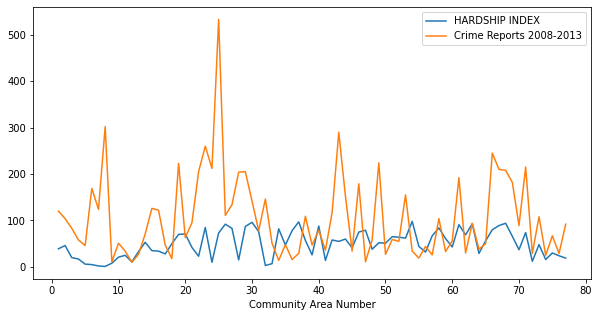

<matplotlib.axes._subplots.AxesSubplot at 0x7fd0048eb670>

In [0]:
censusdf.toPandas().iloc[:-1,:].plot(x='Community Area Number', y=['HARDSHIP INDEX', 'Crime Reports 2008-2013'] , kind='line', figsize=(10, 5),)

#### Plot of Theft incidents and number of dependents in an area

Out[236]:

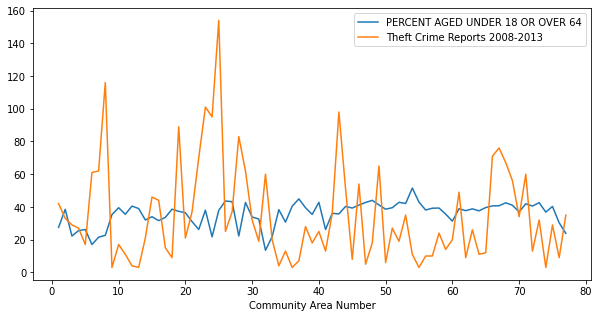

<matplotlib.axes._subplots.AxesSubplot at 0x7fd0048e6130>

In [0]:
censusdf.toPandas().iloc[:-1,:].plot(x='Community Area Number', y=['PERCENT AGED UNDER 18 OR OVER 64', 'Theft Crime Reports 2008-2013'] , kind='line', figsize=(10, 5),)

#### Relationship between Unemployment and Narcotic drug uage in an area

Out[237]:

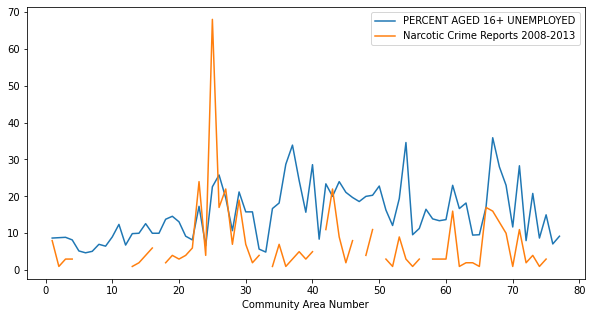

<matplotlib.axes._subplots.AxesSubplot at 0x7fd00470bca0>

In [0]:
censusdf.toPandas().iloc[:-1,:].plot(x='Community Area Number', y=['PERCENT AGED 16+ UNEMPLOYED', 'Narcotic Crime Reports 2008-2013'] , kind='line', figsize=(10, 5),)

#### Relationship between Unemployment and Thefts in an area

Out[238]:

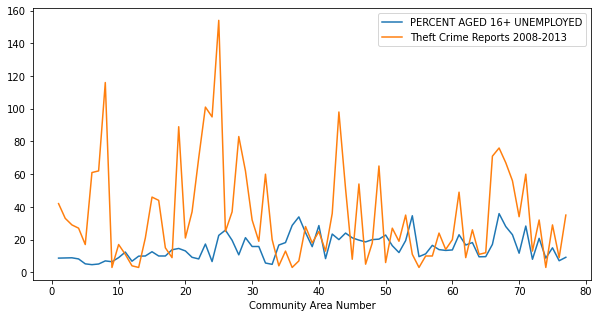

<matplotlib.axes._subplots.AxesSubplot at 0x7fd0046f1ac0>

In [0]:
censusdf.toPandas().iloc[:-1,:].plot(x='Community Area Number', y=['PERCENT AGED 16+ UNEMPLOYED', 'Theft Crime Reports 2008-2013'] , kind='line', figsize=(10, 5),)